#### __IRIS FLOWER CLASSIFICATION__

#### __1. Business Understanding__ 

**Problem Statement:** Utilizing the Iris flower dataset, which comprises three species - setosa, versicolor, and virginica, distinguishable by their measurements, the task is to develop a machine learning model capable of accurately classifying Iris flowers into their respective species. By leveraging the sepal and petal measurements provided in the dataset, the objective is to train a model that can effectively classify Iris flowers, thus serving as an introductory classification task widely used in machine learning.

**Goal:** The goal is to develop a machine learning model that accurately classifies Iris flowers into their respective species based on their sepal and petal measurements, using the Iris dataset as an introductory classification task in machine learning.

#### __1.2 Hypothesis__

**Null hypothesis (H0):** There is no correlation between the features 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' and the target variable 'species'.

**Alternative hypothesis (HA):** There is a correlation between the features 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' and the target variable 'species'.

#### __2. Data Understanding__

#### __2.1 Importation of Libraries__

In [ ]:
# For Data Manipulation
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# For Filter Warnings
import warnings
warnings.filterwarnings("ignore")
 



#### __2.2 Data Loading__

In [ ]:
iris_df = pd.read_csv(r'C:\Users\USER\Documents\Data Science\CODESOFT\Data IRIS FLOWER\IRIS.csv')

#### __2.3 Exploratory Data Analysis (EDA)__

In [ ]:
# Dataset Overview
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Number of columns and rows in sales_df
print (iris_df.shape)
print(f"There are {iris_df.shape[0]} rows, and {iris_df.shape[1]} columns")

(150, 5)
There are 150 rows, and 5 columns


In [ ]:
# checking info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Describing the data
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
# checking for duplicates
print("There are ",iris_df.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [ ]:
# Remove duplicates
iris_df = iris_df.drop_duplicates()

# Display the number of rows after removing duplicates
print("There are ",iris_df.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [ ]:
# Checking for missing values
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Get unique values for each column
for column in iris_df.columns:
    unique_values = iris_df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in sepal_length:
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]

Unique values in sepal_width:
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

Unique values in petal_length:
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]

Unique values in petal_width:
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]

Unique values in species:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



- Species column has 3 categorical variables.

#### __2.4 Univariate Analysis__

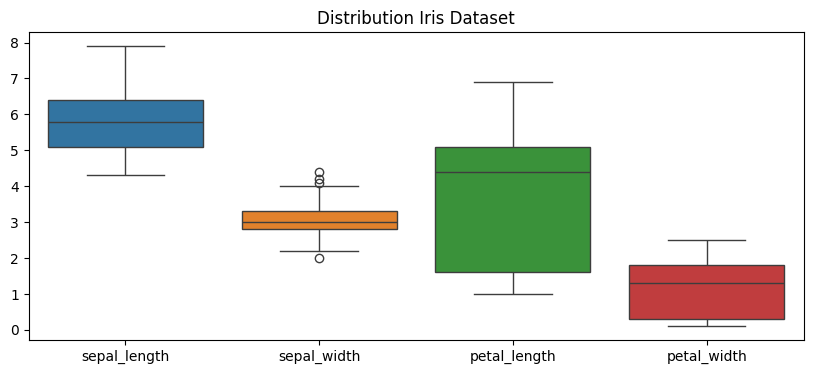

In [ ]:
# Check for outliers in the dataset using boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=iris_df)
plt.title('Distribution Iris Dataset')
plt.show()

- There are a few outliers in the sepal_width column

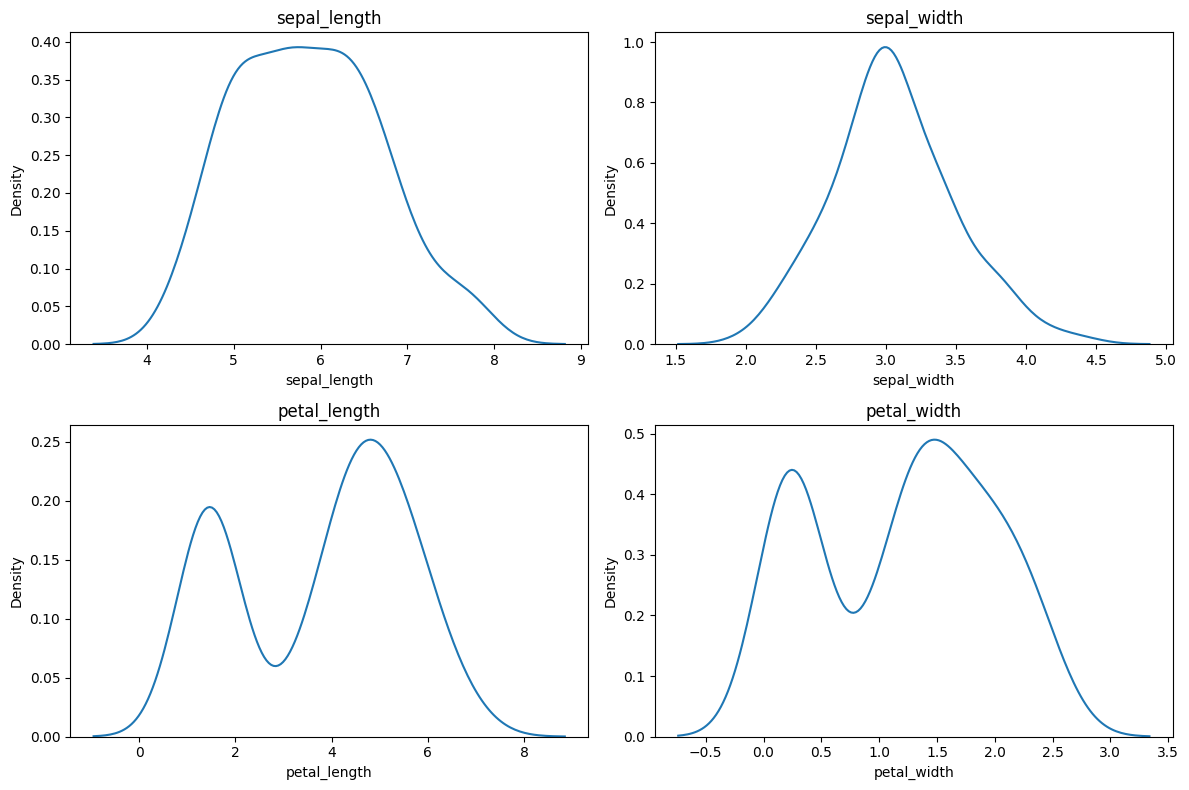

In [ ]:
# KDE Plot
# Select the columns for plotting
columns_to_plot = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Adjust the figure size as needed

# Iterate over the columns and create KDE plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.kdeplot(data=iris_df, x=column, ax=ax)
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

- Columns sepal_length and and sepal_width have a normal distribution. 

#### __2.5 Bivariate Analysis__

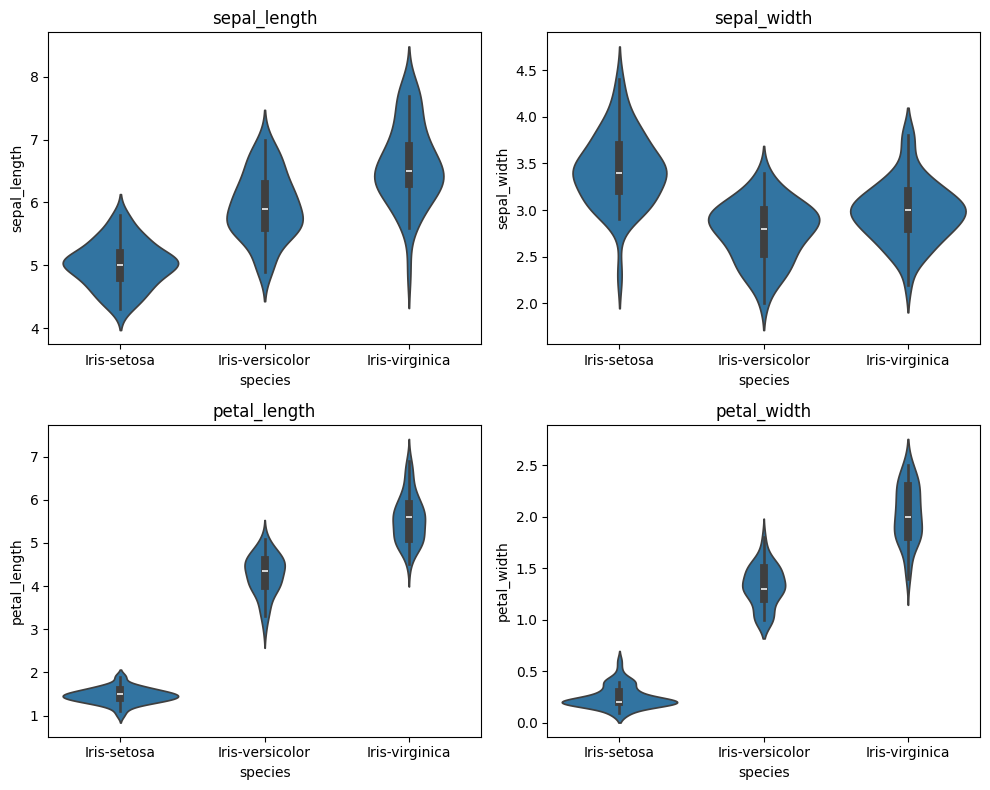

In [ ]:
# Create violin plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the figure size as needed

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.violinplot(data=iris_df, x='species', y=feature, ax=ax)
    ax.set_title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

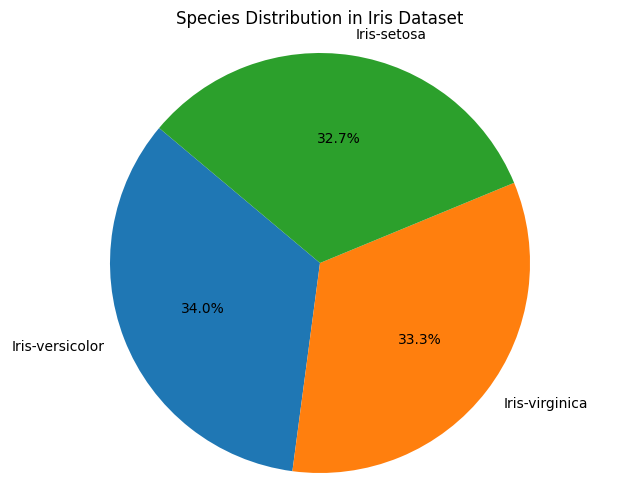

In [ ]:
# Species distribution
# Calculate species distribution
species_distribution = iris_df['species'].value_counts()

# Define a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(species_distribution, labels=species_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Species Distribution in Iris Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- Species with the highest distribution of iris flowers is iris-versicolor, followed by iris-virginica and finally iris-setosa.

#### __2.6 Multivariate Analysis__

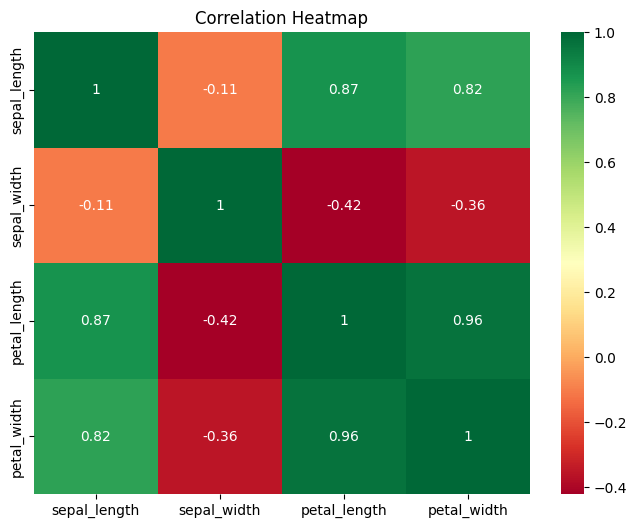

In [ ]:
# Heatmap for the dataset to show correlation 
correlation_matrix = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

- There is a strong positive correlation between sepal_length and petal-length and petal_width. 

#### __2.7 Hypothesis Testing__ 

In [ ]:
# Group the data by species
grouped_data = iris_df.groupby('species')

# Extract the feature columns and flatten them
sepal_length = grouped_data['sepal_length'].apply(list).values
sepal_width = grouped_data['sepal_width'].apply(list).values
petal_length = grouped_data['petal_length'].apply(list).values
petal_width = grouped_data['petal_width'].apply(list).values

sepal_length = np.concatenate(sepal_length)
sepal_width = np.concatenate(sepal_width)
petal_length = np.concatenate(petal_length)
petal_width = np.concatenate(petal_width)

# Perform ANOVA test for each feature
fvalue, pvalue = f_oneway(sepal_length, sepal_width, petal_length, petal_width)

# Create a DataFrame to display the results
results = pd.DataFrame({'Feature': ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        'F-value': fvalue,
                        'p-value': pvalue})

# Set the significance level
alpha = 0.05

# Print the results with alpha and reject/not reject information
for _, row in results.iterrows():
    feature = row['Feature']
    p_value = round(row['p-value'], 4)
    reject_null = "Reject" if p_value < alpha else "Not Reject"

    print(f"Feature: {feature}")
    print(f"p-value: {p_value}")
    print(f"Null Hypothesis: {reject_null} Null Hypothesis")
    print()

Feature: sepal_length
p-value: 0.0
Null Hypothesis: Reject Null Hypothesis

Feature: sepal_width
p-value: 0.0
Null Hypothesis: Reject Null Hypothesis

Feature: petal_length
p-value: 0.0
Null Hypothesis: Reject Null Hypothesis

Feature: petal_width
p-value: 0.0
Null Hypothesis: Reject Null Hypothesis



- Therefore, petal and sepal length and widith determines the type of species of iris flowers. 

#### __3 Data Preparation__ 

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
# Select numerical and categorical columns
num_cols = iris_df.select_dtypes(include=['float64']).columns
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

#### __3.1 Split Dataset into Training and Evaluation__

In [ ]:
cat_cols = iris_df.select_dtypes(include=['object']).columns
cat_cols

Index(['species'], dtype='object')

In [ ]:
# Define Features and target
X=iris_df.drop('species', axis=1)
y= iris_df['species']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Encode the dataset for machine learning
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)


In [ ]:
# Check y_tain and y_test dimension
print('y_train dimension:',y_train.shape)
print('y_test dimension:',y_test.shape)

y_train dimension: (102,)
y_test dimension: (45,)


In [ ]:
# check X_train and X_test dimension
print('X_train dimension:',X_train.shape)
print('X_test dimension:',X_test.shape)

X_train dimension: (102, 4)
X_test dimension: (45, 4)


#### __3.2 Prepare Pipelines__

In [ ]:
# Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # impute numerical columns with mean
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # impute with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, num_cols),
    ('cat_pipeline', categorical_pipeline, cat_cols)
])


#### __3.3 Model Building__ 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Assuming iris_df is your DataFrame containing the Iris dataset
# Example:
# iris_df = pd.read_csv('iris.csv')

# Split data into features (X) and target variable (y)
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define numeric and categorical columns
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # impute numerical columns with mean
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # impute with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, num_cols),
    ('cat_pipeline', categorical_pipeline, cat_cols)
])

# List of models with their names
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(kernel='linear')),
    ('Naive_Bayes', GaussianNB())
]

# Dictionary to store all pipelines and metrics
all_pipelines = {}
all_metrics = {}

# DataFrame to store metrics
metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Iterate over each model
for model_name, classifier in models:
    # create final pipeline with preprocessor and classifier
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train) 
    
    # Add all pipelines into the all_pipelines dictionary
    all_pipelines[model_name] = final_pipeline
    
    # Make predictions
    y_pred = final_pipeline.predict(X_test)
    
    # Generate classification report for each pipeline or model
    metrics = classification_report(y_test, y_pred, output_dict=True)
    all_metrics[model_name] = metrics

    # Grab all important metrics 
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Append metrics to the DataFrame
    metric_table.loc[len(metric_table)] = [model_name, accuracy, precision, recall, f1]

print(metric_table)


            model_name  accuracy  precision    recall  f1_score
0        Decision_Tree  0.888889   0.889881  0.888889  0.888765
1  Logistic_Regression  0.911111   0.915535  0.911111  0.910714
2                  KNN  0.911111   0.929825  0.911111  0.909502
3        Random_Forest  0.911111   0.915535  0.911111  0.910714
4                  SVM  0.911111   0.915535  0.911111  0.910714
5          Naive_Bayes  0.911111   0.915535  0.911111  0.910714


In [ ]:
# Sort metric_table by F1-score in descending order
best_model = metric_table.sort_values(by=['f1_score'], ascending=False).iloc[0]

print("Best Model based on F1-score:")
print(best_model)

Best Model based on F1-score:
model_name    Logistic_Regression
accuracy                 0.911111
precision                0.915535
recall                   0.911111
f1_score                 0.910714
Name: 1, dtype: object


__3.4 Save the best Model__ 

In [ ]:
# Get the name of the best model
best_model_name = metric_table.sort_values(by=['f1_score'], ascending=False).iloc[0]['model_name']

# Get the pipeline corresponding to the best model
best_pipeline = all_pipelines[best_model_name]

# Save the best model to a file
joblib.dump(best_pipeline, 'best_model.pkl')

['best_model.pkl']